# Test of Piecewise Smooth Quadratic Estimators

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import interval as ival
import psl_under as pl
import psqe_under as pq

Auxiliary plot routine

In [13]:
def plot_problem(flist, minlist, a, b):
    colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (b-a)/1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)
    
    fta = np.empty([num_funcs, num_points])
    print(fta)
    
    for i in range(num_funcs):
        for j in range(num_points):
            fta[i,j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i,:], colors[i])
    for point in min_list:
        plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d,ub + d])
    plt.show() 

Test problem

In [17]:
x = sym.symbols('x')
e_f = x**3 + 2 * x**2 - 4 * x + 1
e_df = sym.diff(e_f)
e_ddf = sym.diff(e_df)
print(e_f, e_df, e_ddf)
f = sym.lambdify(x, e_f)
df = sym.lambdify(x, e_df)
ddf = sym.lambdify(x, e_ddf)
print(f(2.), df(2.))
a = -1.
b = 2.
idef = ival.Interval([a,b])
di = df(idef)

# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

x**3 + 2*x**2 - 4*x + 1 3*x**2 + 4*x - 4 6*x + 4
9.0 16.0
[-8.0, 16.0] [-2.0, 16.0]


In [18]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
l = max(-di.x[0], di.x[1])
L = max(-ddi.x[0], ddi.x[1])
# print(L)
estim_pl = pl.PSL_Under(a, b, di.x[0], di.x[1], f)
estim_plip = pl.PSL_Under(a, b, -l, l, f)
estim_int = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
estim_lip = pq.PSQE_Under(a, b, -L, L, f, df)
print(estim_pl)
print(estim_plip)
print(estim_int)
print(estim_lip)
print(estim_lip.lower_bound_and_point())
min_list = [estim_pl.lower_bound_and_point(),estim_plip.lower_bound_and_point(),estim_int.lower_bound_and_point(), estim_lip.lower_bound_and_point()]
print(min_list)

Piecewise linear estimator a = -1.0, b = 2.0, c = 0.875, alp = -8.0, bet = 16.0, fa = 6.0, fb = 9.0
Piecewise linear estimator a = -1.0, b = 2.0, c = 0.40625, alp = -16.0, bet = 16.0, fa = 6.0, fb = 9.0
Estimator a = -1.0, b = 2.0, c = 0.25, d = 1.75, alp = -2.0, bet = 16.0, fa = 6.0, fb = 9.0, dfa = -5.0, dfb = 16.0
Estimator a = -1.0, b = 2.0, c = -0.38247282608695654, d = 1.7737771739130435, alp = -16.0, bet = 16.0, fa = 6.0, fb = 9.0, dfa = -5.0, dfb = 16.0
(0.5475543478260869, -7.057958707466919)
[(0.875, -9.0), (0.40625, -16.5), (0.71875, -3.5703125), (0.5475543478260869, -7.057958707466919)]


Vizualize test problem

[[ 6.94128854e-310  6.94128854e-310  3.37051425e-316 ...  6.94125075e-310
   6.94125075e-310  8.84233738e+028]
 [ 6.94125075e-310  6.94125075e-310 -2.04533883e-170 ...  1.63296402e-087
   6.94125057e-310  6.94125058e-310]
 [ 9.96100942e+017  6.94125057e-310  6.94125058e-310 ...  6.94119045e-310
   1.82444744e+059  6.94121731e-310]
 [ 6.94119045e-310  1.20192366e+269  6.94121725e-310 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  6.92957351e-298
   3.43937673e-317  6.94118763e-310]]


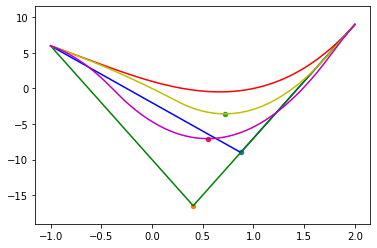

In [19]:
plot_problem([f,estim_pl.estimator,estim_plip.estimator,estim_int.estimator, estim_lip.estimator], min_list, a, b)